In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r"C:\Users\jagad\Videos\Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Univariate Analysis


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

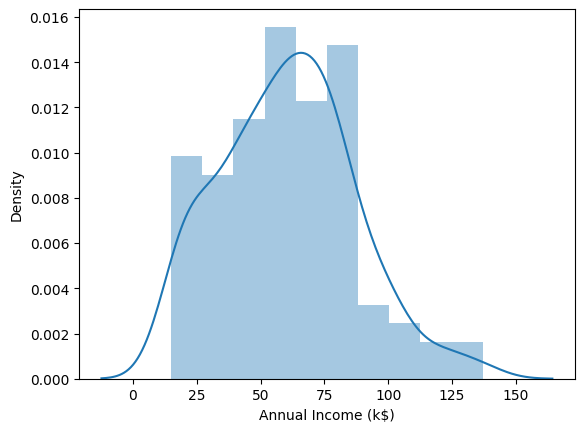

In [5]:
sns.distplot(df['Annual Income (k$)'])

In [6]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

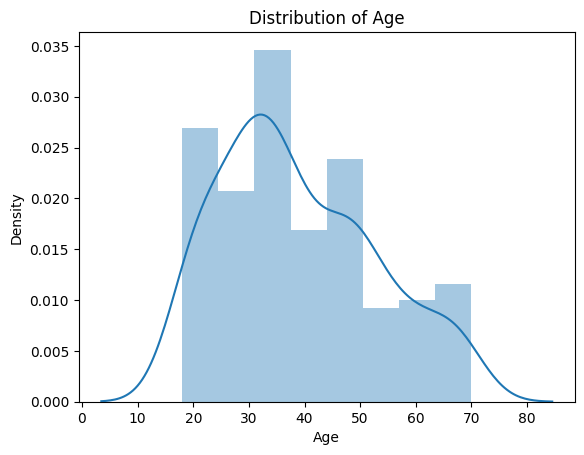

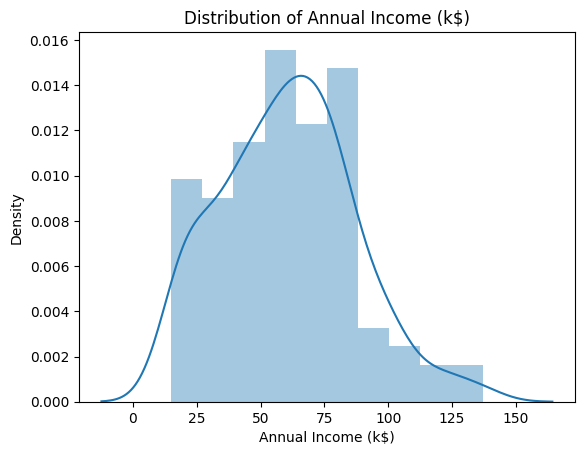

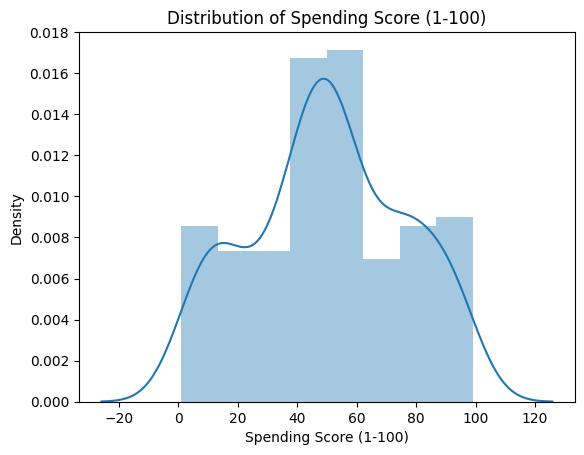

In [7]:
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
for i in columns:
    plt.figure()
    sns.distplot(df[i])
    plt.title(f'Distribution of {i}')
    plt.show()


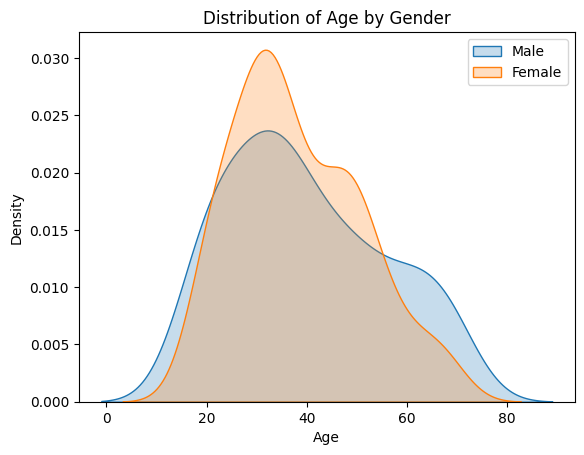

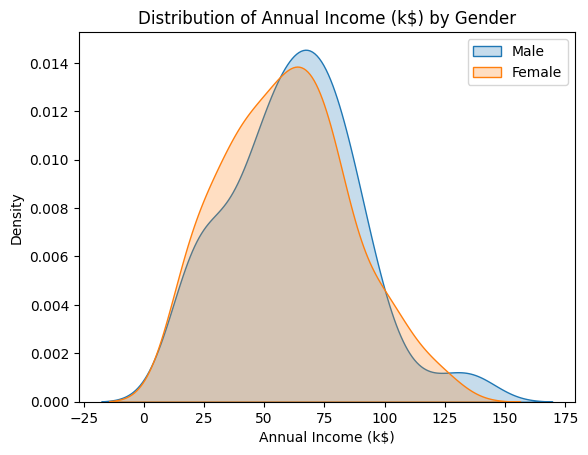

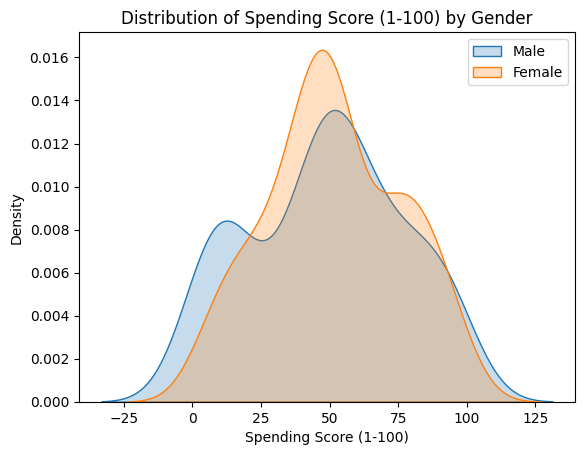

In [8]:
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

for i in columns:
    plt.figure()
    for gender in df['Gender'].unique():
        sns.kdeplot(data=df[df['Gender'] == gender][i], shade=True, label=gender)
    plt.title(f'Distribution of {i} by Gender')
    plt.legend()
    plt.show()






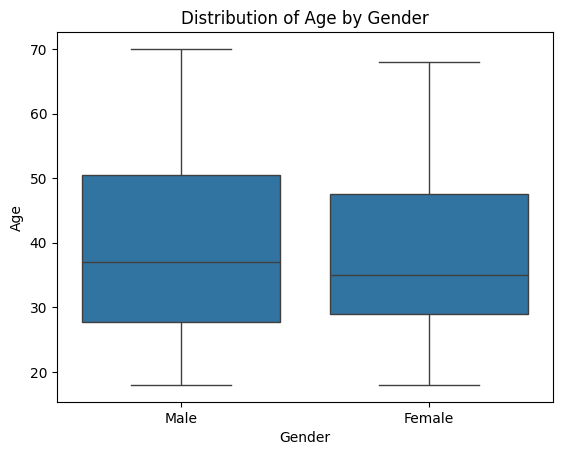

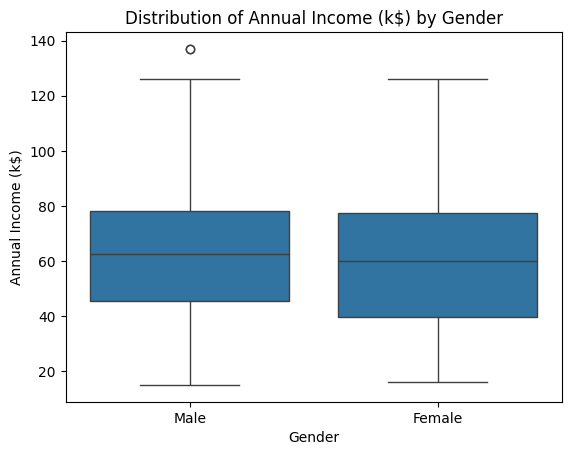

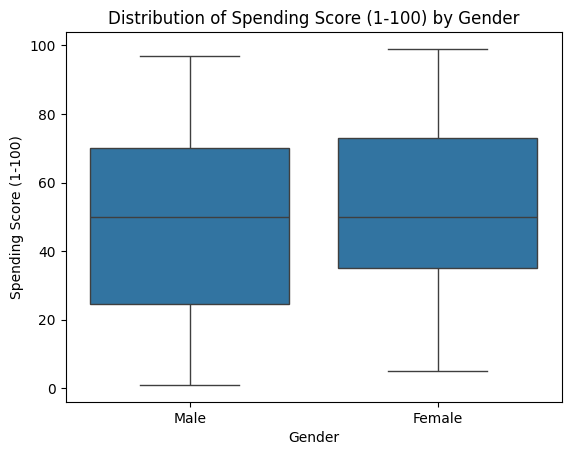

In [9]:
columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=i)
    plt.title(f'Distribution of {i} by Gender')
    plt.show()


In [10]:
df["Gender"].value_counts(normalize = True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [11]:
## Bivariate analysis


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

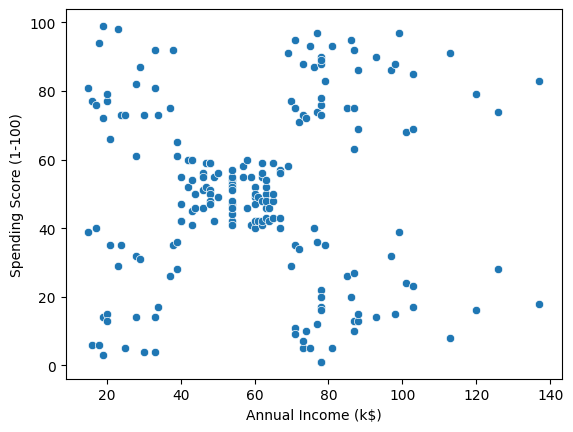

In [12]:
sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)")

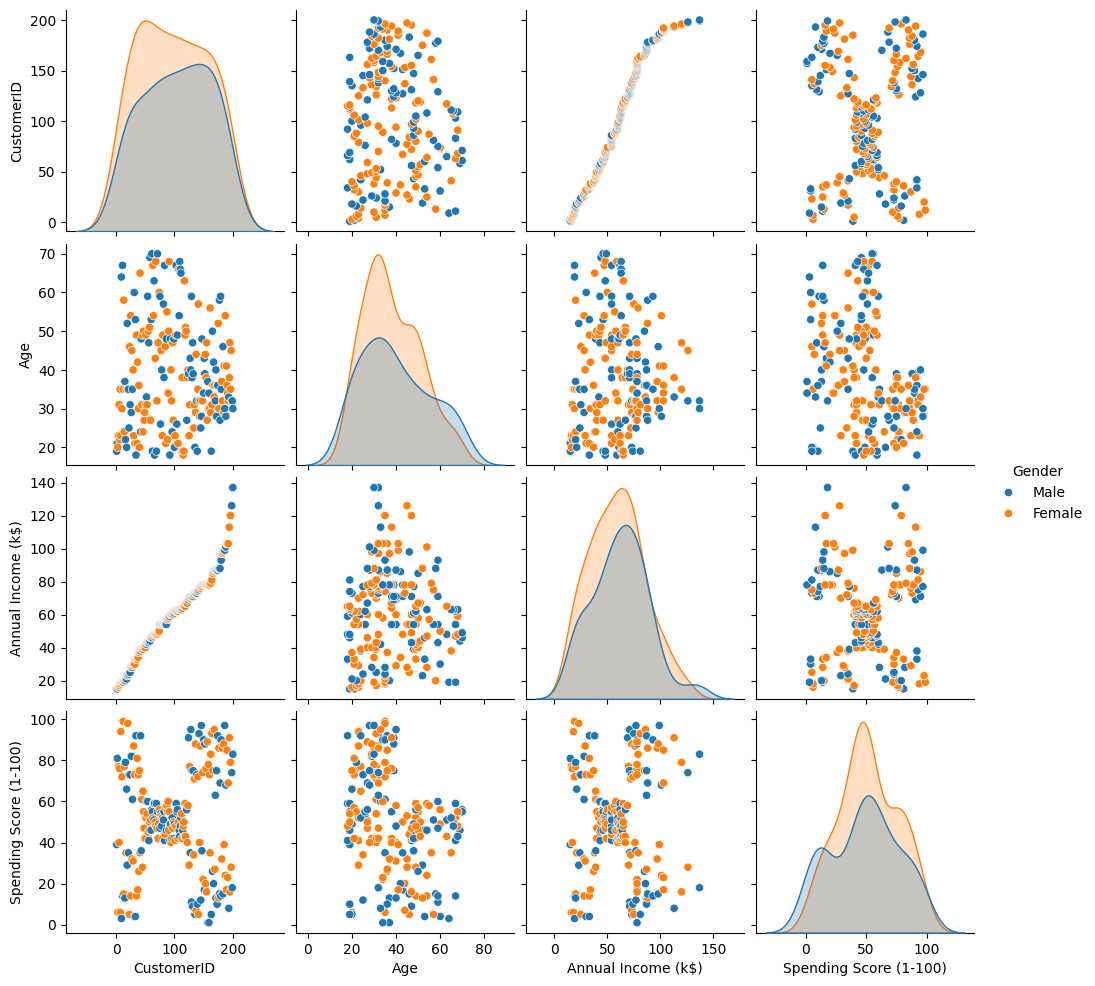

In [13]:
#df = df.drop('CustomerID',axis=1)
sns.pairplot(df, hue='Gender')

In [14]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [15]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

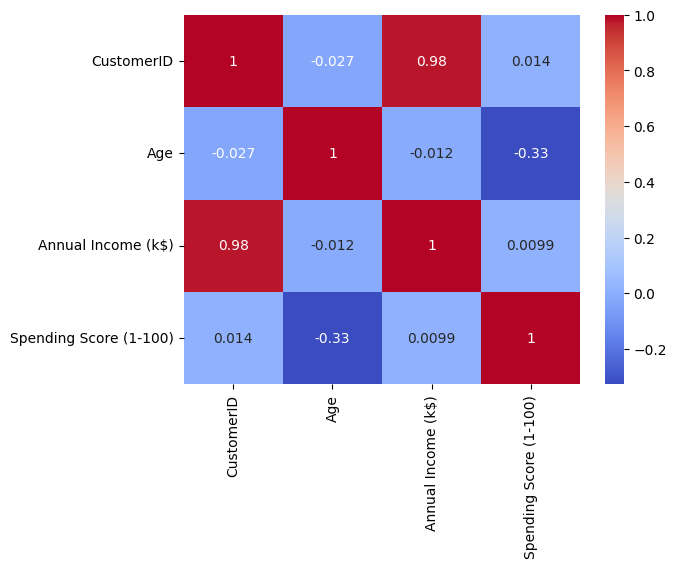

In [16]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

In [17]:
# Clustering Univariate, Bivariate and Multivarite

In [24]:
clustering1 = KMeans(n_clusters=3)


In [25]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [26]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [27]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [28]:
df['Income Cluster'].value_counts()


Income Cluster
1    90
0    74
2    36
Name: count, dtype: int64

In [29]:
clustering1.inertia_

23517.330930930933

In [30]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [31]:
intertia_scores

[137277.27999999997,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3949.275613275613,
 2822.4996947496948,
 2396.9850649350656,
 1737.1612554112553]

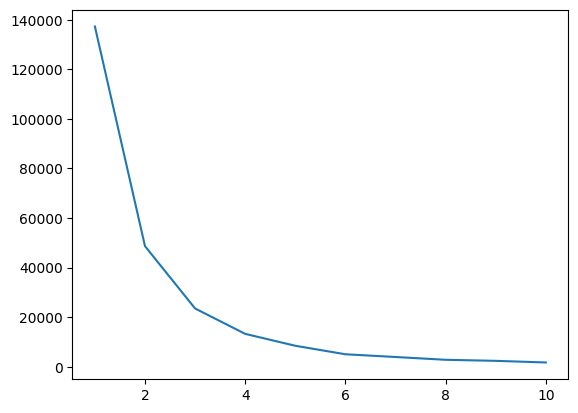

In [32]:
plt.plot(range(1,11),intertia_scores)

In [33]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [35]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


In [36]:
#Bivariate Clustering


In [37]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,2


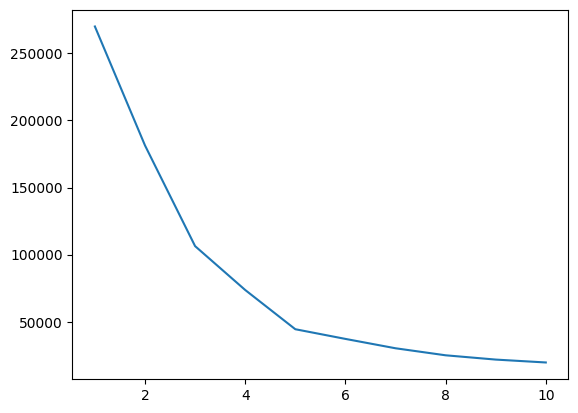

In [38]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [39]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

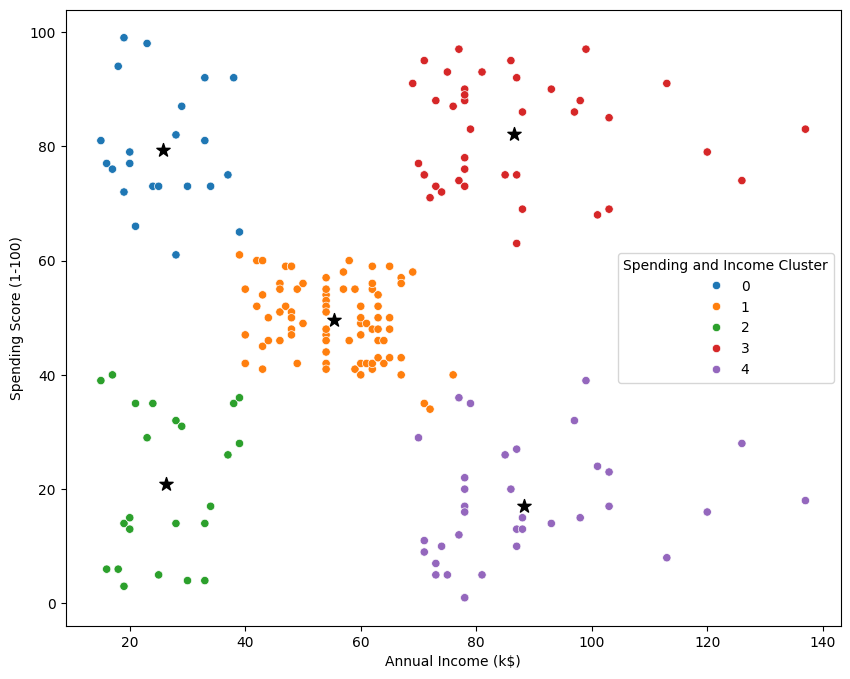

In [40]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [41]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.592593,0.407407
2,0.608696,0.391304
3,0.538462,0.461538
4,0.457143,0.542857


In [43]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,42.716049,55.296296,49.518519
2,45.217391,26.304348,20.913043
3,32.692308,86.538462,82.128205
4,41.114286,88.200000,17.114286


In [44]:
#mulivariate clustering 
from sklearn.preprocessing import StandardScaler

In [45]:
scale = StandardScaler()

In [46]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,2


In [47]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,0,2,True
1,2,21,15,81,0,0,True
2,3,20,16,6,0,2,False
3,4,23,16,77,0,0,False
4,5,31,17,40,0,2,False


In [48]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [49]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [50]:

dff = scale.fit_transform(dff)

In [51]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


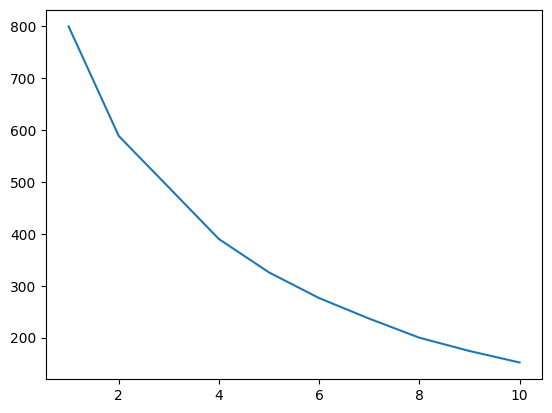

In [52]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [53]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,2
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,3
196,197,Female,45,126,28,2,4
197,198,Male,32,126,74,2,3
198,199,Male,32,137,18,2,4


In [54]:
df.to_csv('Clustering.csv')